In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

# Lena Image
lena = cv2.imread("Lena.png", 1)
# converting BGR to RGB
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

# Conversion of Lena to grayscale
gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

In [2]:
def Interpolate(img,x,y):
    xs = math.floor(x)
    ys = math.floor(y)
    neighbours = [(xs,ys),(xs,ys+1),(xs+1,ys),(xs+1,ys+1)]
    a = x-xs
    b = y-ys
    try: #used to eliminate the boundary case where list index goes out of range
        res = (1-a)*(1-b)*img[xs][ys] + (1-a)*b*img[xs][ys+1] + (1-b)*a*img[xs+1][ys] + a*b*img[xs+1][ys+1]
    except IndexError:
        res = img[xs][ys]
    return res

In [3]:
def Bilinear_Interpolation(img,factor):
    if factor == 1:
        return img
    sh = img.shape #result shape
    res_shape = ( int(sh[0]*factor) , int(sh[1]*factor) , 3 )  
    res = np.zeros(res_shape,dtype='uint8')
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            temp = Interpolate(img,i/factor,j/factor)
            res[i,j][0] = int(temp[0])
            res[i,j][1] = int(temp[1])
            res[i,j][2] = int(temp[2])
    return res

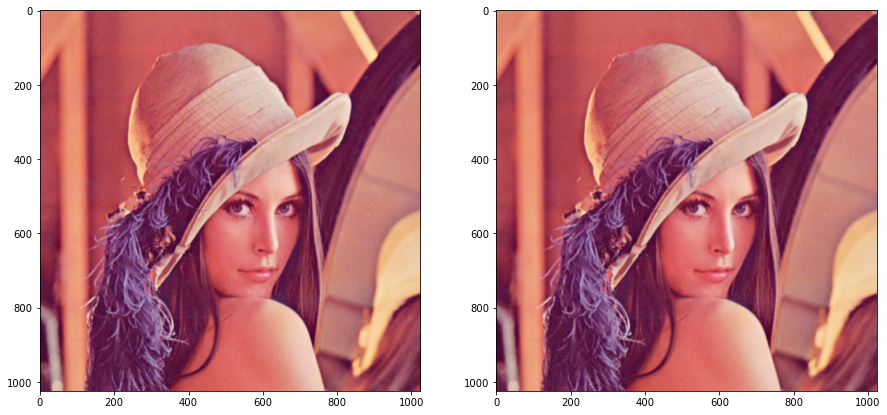

In [4]:
#image scale -> 2
res = Bilinear_Interpolation(lena_rgb, 2)
res1 = cv2.resize(lena_rgb ,(lena_rgb.shape[0]*2, lena_rgb.shape[1]*2),cv2.INTER_AREA)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(res1,cmap='gray')
plt.show()

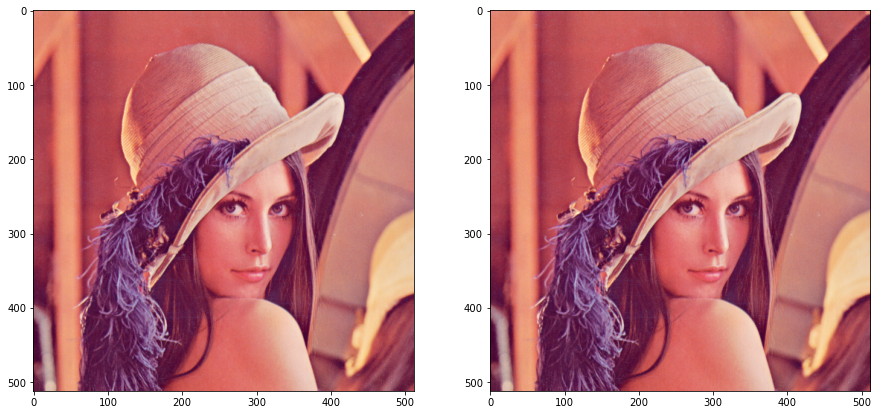

In [5]:
#image scale -> 1
res = Bilinear_Interpolation(lena_rgb, 1)
res1 = cv2.resize(lena_rgb, (lena_rgb.shape[0], lena_rgb.shape[1]),cv2.INTER_AREA)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(res1,cmap='gray')
plt.show()

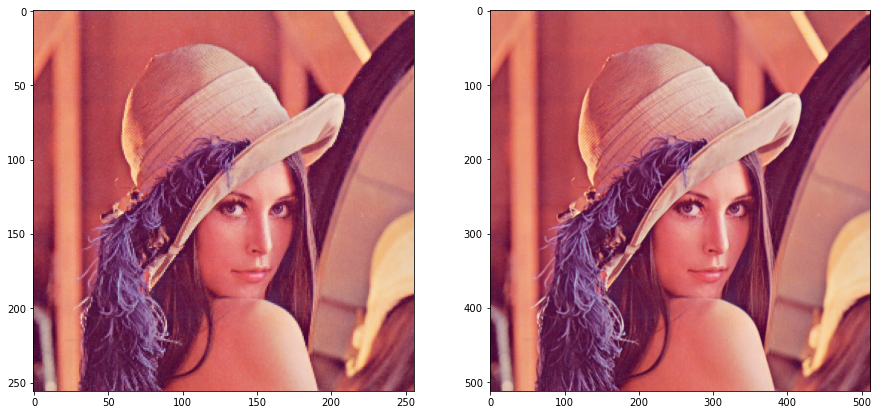

In [6]:
#image scale -> 0.5
res = Bilinear_Interpolation(lena_rgb, 0.5)
res1 = cv2.resize(lena_rgb, (lena_rgb.shape[0], lena_rgb.shape[1]),cv2.INTER_AREA)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(res,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(res1,cmap='gray')
plt.show()